In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('/content/Students Performance Dataset.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Dataset shape: (5000, 23)
Columns: ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']


In [4]:
# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\n=== FIRST 5 ROWS ===")
print(df.head())

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== BASIC STATISTICS ===")
print(df.describe())


=== DATASET OVERVIEW ===
Number of records: 5000
Number of features: 23

=== FIRST 5 ROWS ===
  Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Mathematics           97.36          40.61        59.61  ...   
1     Business           97.71          57.27        74.00  ...   
2  Engineering           99.52          41.84        63.85  ...   
3  Engineering           90.38          45.65        44.44  ...   
4           CS           59.41          53.13        61.77  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_p

In [5]:
# Check for missing values
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


=== MISSING VALUES ===
Parent_Education_Level    1025
dtype: int64


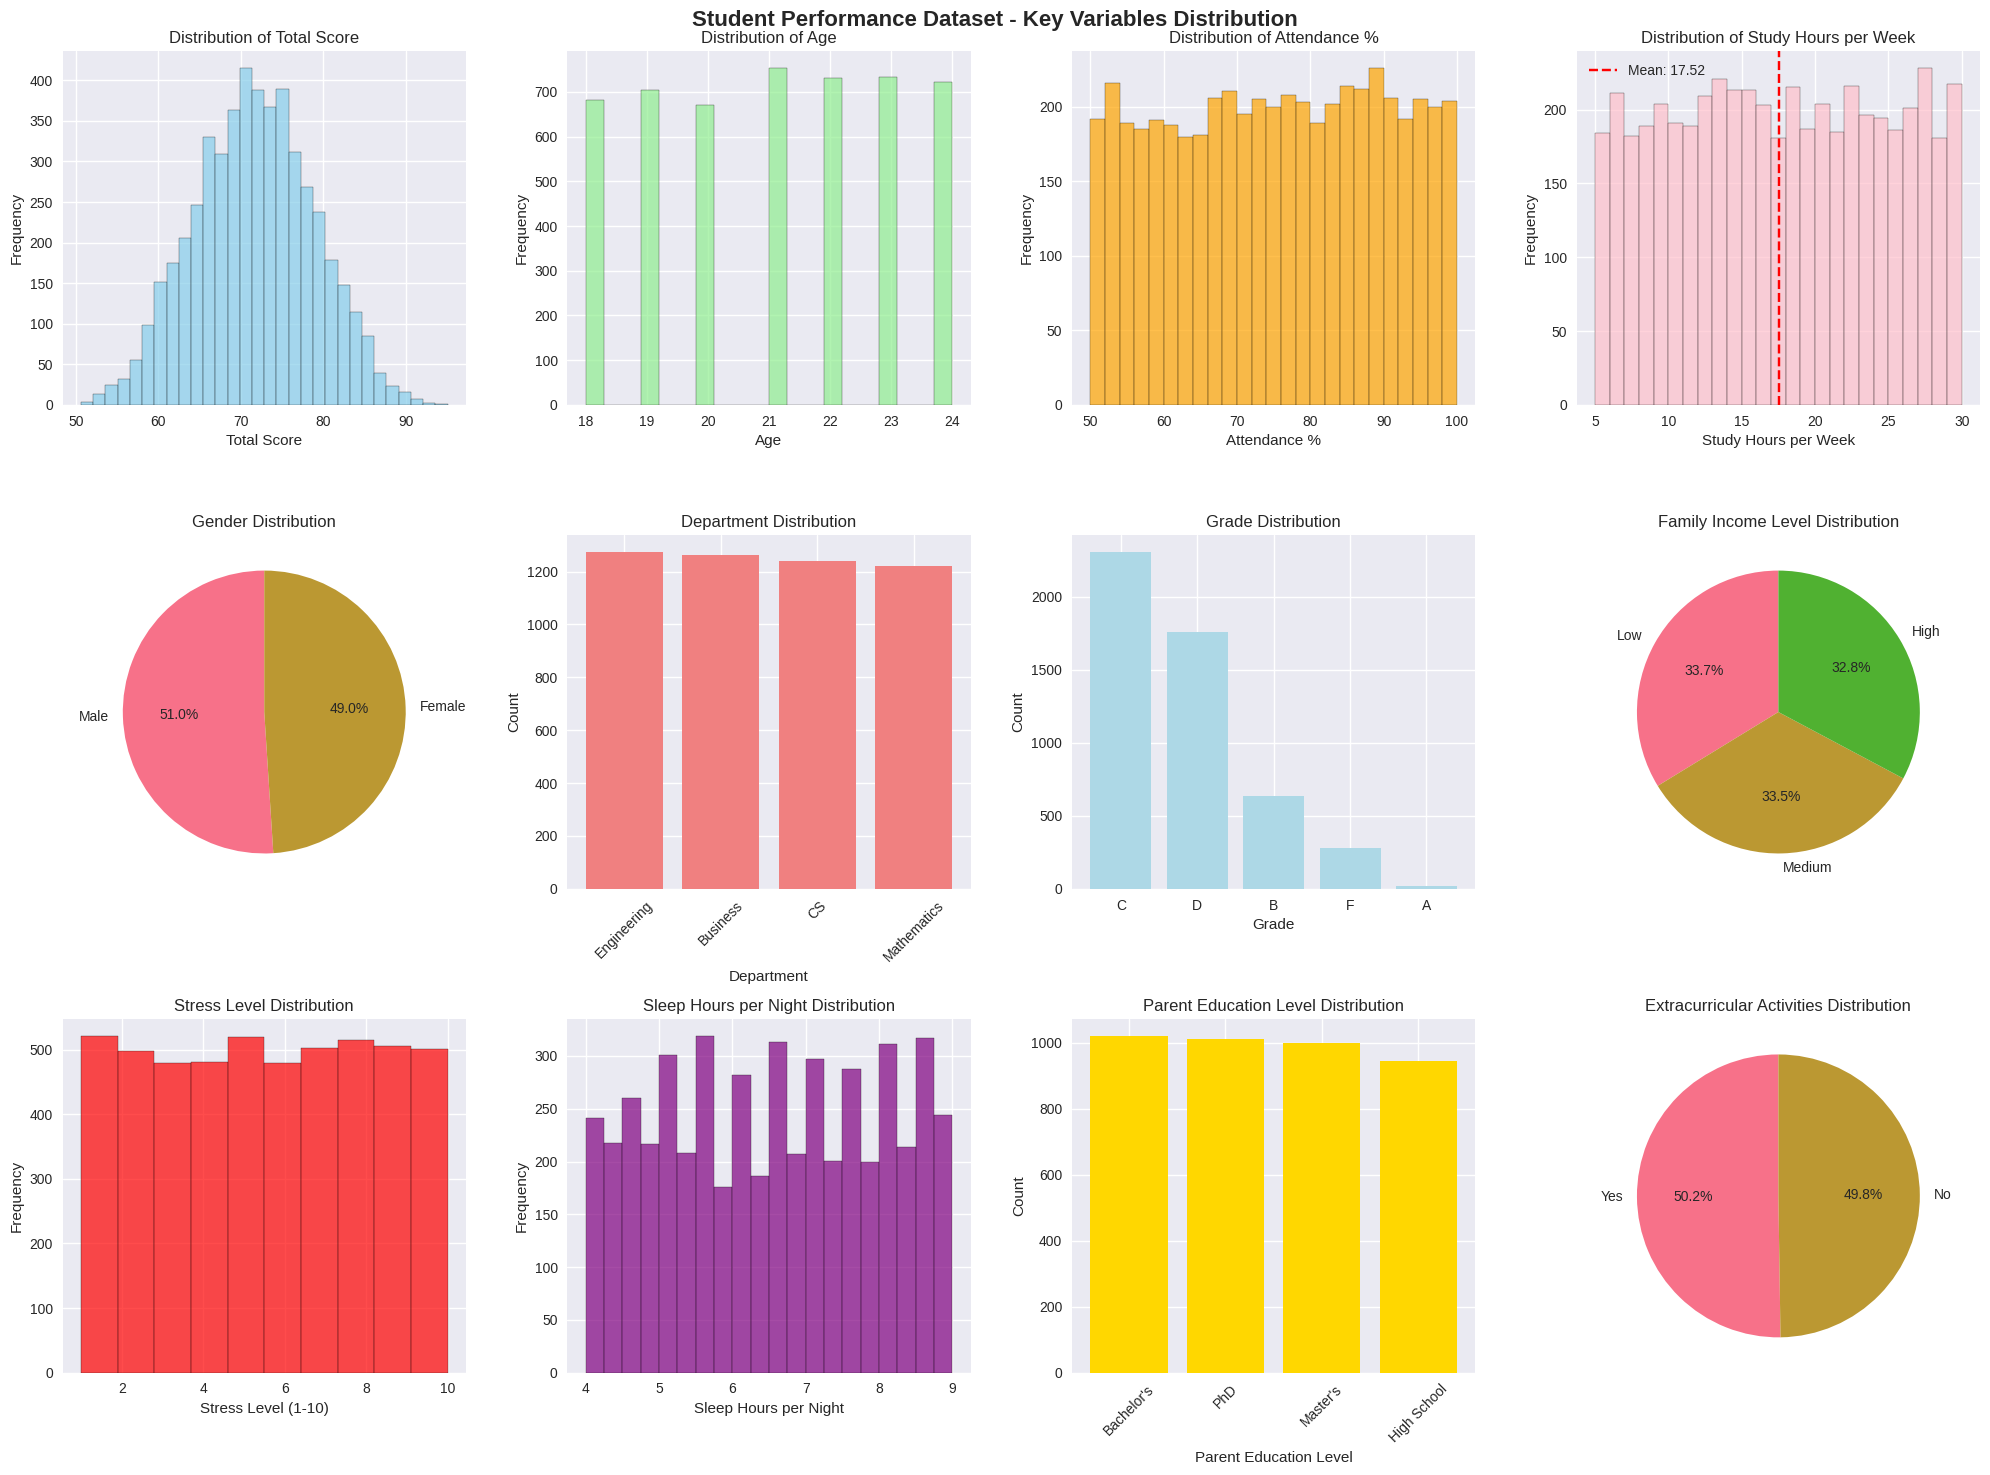

In [6]:
# Create comprehensive visualization of the dataset
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Student Performance Dataset - Key Variables Distribution', fontsize=16, fontweight='bold')

# Distribution of Total Score (target variable)
axes[0, 0].hist(df['Total_Score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Total Score')
axes[0, 0].set_xlabel('Total Score')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Age
axes[0, 1].hist(df['Age'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Attendance
axes[0, 2].hist(df['Attendance (%)'], bins=25, alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].set_title('Distribution of Attendance %')
axes[0, 2].set_xlabel('Attendance %')
axes[0, 2].set_ylabel('Frequency')

# Distribution of Study Hours
axes[0, 3].hist(df['Study_Hours_per_Week'], bins=25, alpha=0.7, color='pink', edgecolor='black')
stress_mean = df['Study_Hours_per_Week'].mean()
axes[0, 3].axvline(stress_mean, color='red', linestyle='--', label=f'Mean: {stress_mean:.2f}')
axes[0, 3].set_title('Distribution of Study Hours per Week')
axes[0, 3].set_xlabel('Study Hours per Week')
axes[0, 3].set_ylabel('Frequency')
axes[0, 3].legend()

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Gender Distribution')

# Department distribution
dept_counts = df['Department'].value_counts()
axes[1, 1].bar(dept_counts.index, dept_counts.values, color='lightcoral')
axes[1, 1].set_title('Department Distribution')
axes[1, 1].set_xlabel('Department')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Grade distribution
grade_counts = df['Grade'].value_counts()
axes[1, 2].bar(grade_counts.index, grade_counts.values, color='lightblue')
axes[1, 2].set_title('Grade Distribution')
axes[1, 2].set_xlabel('Grade')
axes[1, 2].set_ylabel('Count')

# Family Income Level distribution
income_counts = df['Family_Income_Level'].value_counts()
axes[1, 3].pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 3].set_title('Family Income Level Distribution')

# Stress Level distribution
axes[2, 0].hist(df['Stress_Level (1-10)'], bins=10, alpha=0.7, color='red', edgecolor='black')
axes[2, 0].set_title('Stress Level Distribution')
axes[2, 0].set_xlabel('Stress Level (1-10)')
axes[2, 0].set_ylabel('Frequency')

# Sleep Hours distribution
axes[2, 1].hist(df['Sleep_Hours_per_Night'], bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[2, 1].set_title('Sleep Hours per Night Distribution')
axes[2, 1].set_xlabel('Sleep Hours per Night')
axes[2, 1].set_ylabel('Frequency')

# Parent Education Level distribution
parent_edu_counts = df['Parent_Education_Level'].value_counts()
axes[2, 2].bar(parent_edu_counts.index, parent_edu_counts.values, color='gold')
axes[2, 2].set_title('Parent Education Level Distribution')
axes[2, 2].set_xlabel('Parent Education Level')
axes[2, 2].set_ylabel('Count')
axes[2, 2].tick_params(axis='x', rotation=45)

# Extracurricular Activities distribution
extra_counts = df['Extracurricular_Activities'].value_counts()
axes[2, 3].pie(extra_counts.values, labels=extra_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 3].set_title('Extracurricular Activities Distribution')

plt.tight_layout()
plt.show()


In [7]:
# Drop columns that are not relevant for prediction
columns_to_drop = [
    'Student_ID',      # Unique identifier, not predictive
    'First_Name',      # Personal information, not predictive
    'Last_Name',       # Personal information, not predictive
    'Email',           # Personal information, not predictive
    'Grade'            # This is derived from Total_Score, would cause data leakage
]

print(f"Original dataset shape: {df.shape}")
print(f"Columns to drop: {columns_to_drop}")

# Create a copy for processing
df_processed = df.drop(columns=columns_to_drop)
print(f"Dataset shape after dropping irrelevant columns: {df_processed.shape}")
print(f"Remaining columns: {list(df_processed.columns)}")

Original dataset shape: (5000, 23)
Columns to drop: ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Grade']
Dataset shape after dropping irrelevant columns: (5000, 18)
Remaining columns: ['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']


In [8]:
# Check for missing values in the processed dataset
print("=== MISSING VALUES ANALYSIS ===")
missing_values = df_processed.isnull().sum()
missing_percentage = (missing_values / len(df_processed)) * 100
missing_info = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})
print(missing_info[missing_info['Missing_Count'] > 0])

# Handle missing values
def handle_missing_values(df):
    df_clean = df.copy()

    # For numeric columns, fill with median
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            median_value = df_clean[col].median()
            df_clean[col].fillna(median_value, inplace=True)
            print(f"Filled missing values in {col} with median: {median_value:.2f}")

    # For categorical columns, fill with mode
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            mode_value = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_value, inplace=True)
            print(f"Filled missing values in {col} with mode: {mode_value}")

    return df_clean

# Apply missing value handling
df_processed = handle_missing_values(df_processed)

# Verify no missing values remain
print(f"\nMissing values after handling: {df_processed.isnull().sum().sum()}")

=== MISSING VALUES ANALYSIS ===
                        Missing_Count  Missing_Percentage
Parent_Education_Level           1025                20.5
Filled missing values in Parent_Education_Level with mode: Bachelor's

Missing values after handling: 0


=== OUTLIER DETECTION RESULTS ===
Age: 0 outliers (0.00%)
Attendance (%): 0 outliers (0.00%)
Midterm_Score: 0 outliers (0.00%)
Final_Score: 0 outliers (0.00%)
Assignments_Avg: 0 outliers (0.00%)
Quizzes_Avg: 0 outliers (0.00%)
Participation_Score: 0 outliers (0.00%)
Projects_Score: 0 outliers (0.00%)
Total_Score: 4 outliers (0.08%)
Study_Hours_per_Week: 0 outliers (0.00%)
Stress_Level (1-10): 0 outliers (0.00%)
Sleep_Hours_per_Night: 0 outliers (0.00%)


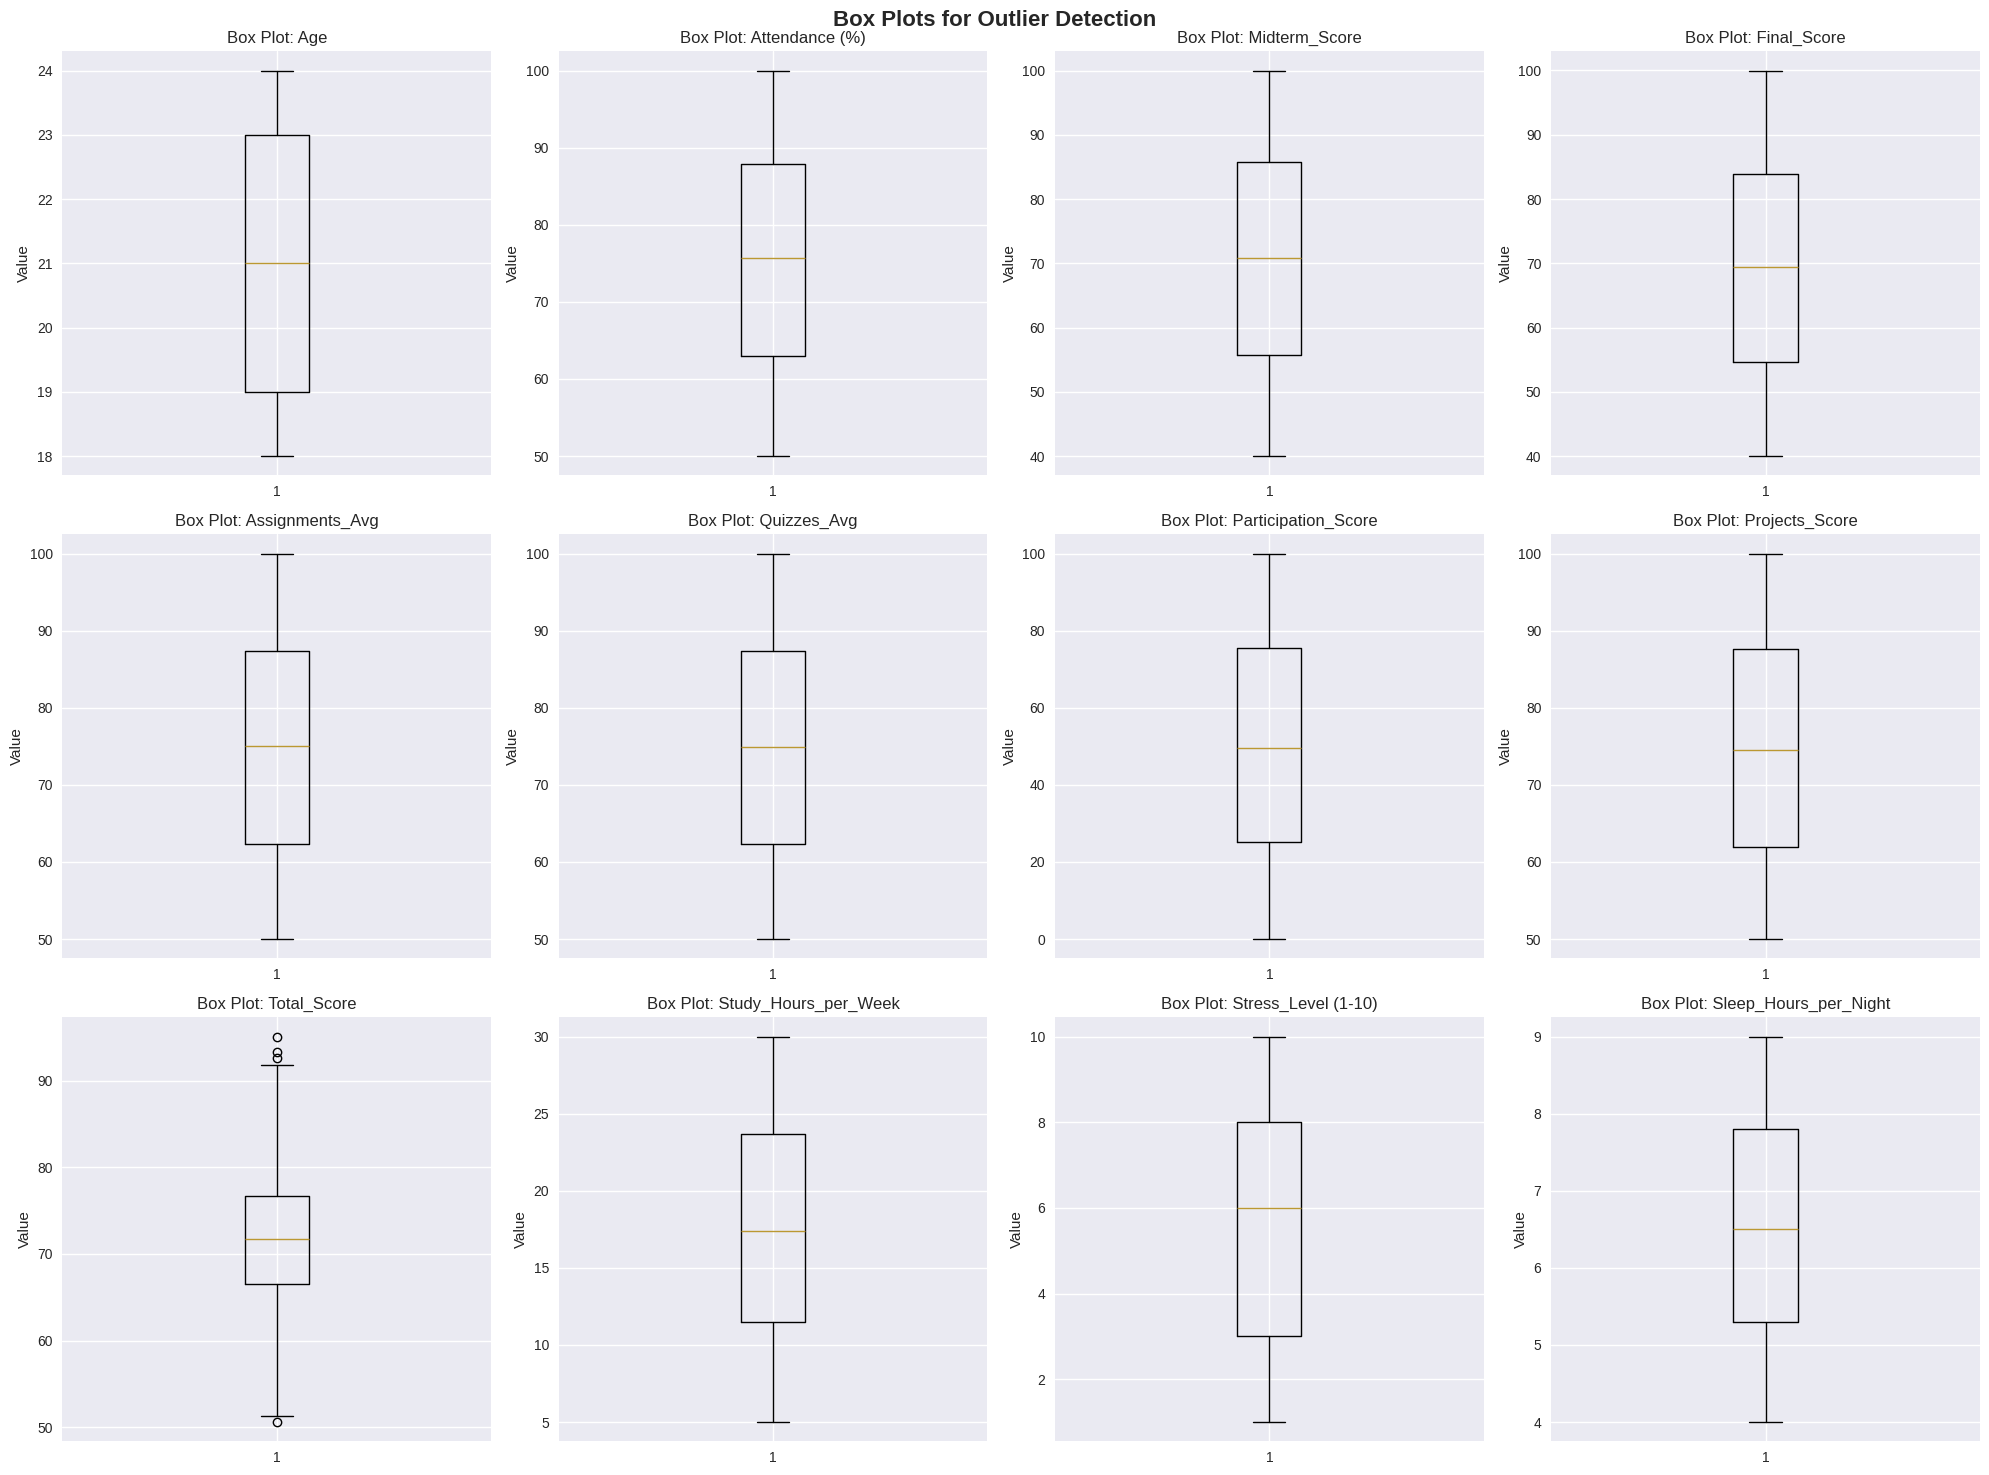

Outliers handled using capping method.


In [9]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return outliers_info

# Detect outliers in numeric columns
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
outliers_info = detect_outliers_iqr(df_processed, numeric_cols)

print("=== OUTLIER DETECTION RESULTS ===")
for col, info in outliers_info.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")

# Visualize outliers using box plots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_cols):
    row = i // 4
    col_idx = i % 4
    if row < 3:
        axes[row, col_idx].boxplot(df_processed[col])
        axes[row, col_idx].set_title(f'Box Plot: {col}')
        axes[row, col_idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Handle outliers using capping method (less aggressive than removal)
def handle_outliers_capping(df, columns):
    df_capped = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

    return df_capped

# Apply outlier handling to numeric columns (excluding target variable)
numeric_cols_for_capping = [col for col in numeric_cols if col != 'Total_Score']
df_processed = handle_outliers_capping(df_processed, numeric_cols_for_capping)

print("Outliers handled using capping method.")

In [10]:
# Create a copy for preprocessing
df_final = df_processed.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = df_final.select_dtypes(include=['object']).columns.tolist()

print("=== ENCODING CATEGORICAL VARIABLES ===")
for col in categorical_cols:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Feature Engineering - Create new features
print("\n=== FEATURE ENGINEERING ===")

# 1. Academic Performance Score (weighted average of key academic metrics)
df_final['Academic_Performance_Score'] = (
    df_final['Midterm_Score'] * 0.3 +
    df_final['Final_Score'] * 0.4 +
    df_final['Assignments_Avg'] * 0.2 +
    df_final['Quizzes_Avg'] * 0.1
)

# 2. Lifestyle Score (combining sleep, stress, and study hours)
df_final['Lifestyle_Score'] = (
    (10 - df_final['Stress_Level (1-10)']) * 0.3 +  # Lower stress is better
    (df_final['Sleep_Hours_per_Night'] / 8) * 10 * 0.3 +  # Normalized sleep hours
    (df_final['Study_Hours_per_Week'] / 40) * 10 * 0.4  # Normalized study hours
)

# 3. Support System Score (combining family income, parent education, internet access)
df_final['Support_System_Score'] = (
    df_final['Family_Income_Level'] * 2 +  # Assuming 0=Low, 1=Medium, 2=High
    df_final['Parent_Education_Level'] * 1.5 +  # Higher education = better support
    df_final['Internet_Access_at_Home'] * 2  # Internet access is important
)

# 4. Engagement Score (combining attendance, participation, and extracurricular)
df_final['Engagement_Score'] = (
    (df_final['Attendance (%)'] / 100) * 10 * 0.4 +
    df_final['Participation_Score'] * 1.0 * 0.3 +
    df_final['Extracurricular_Activities'] * 3 * 0.3
)

print("Created new features:")
print("- Academic_Performance_Score")
print("- Lifestyle_Score")
print("- Support_System_Score")
print("- Engagement_Score")

# Display the final dataset info
print(f"\nFinal dataset shape: {df_final.shape}")
print(f"Final columns: {list(df_final.columns)}")

=== ENCODING CATEGORICAL VARIABLES ===
Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded Department: {'Business': np.int64(0), 'CS': np.int64(1), 'Engineering': np.int64(2), 'Mathematics': np.int64(3)}
Encoded Extracurricular_Activities: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded Internet_Access_at_Home: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded Parent_Education_Level: {"Bachelor's": np.int64(0), 'High School': np.int64(1), "Master's": np.int64(2), 'PhD': np.int64(3)}
Encoded Family_Income_Level: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

=== FEATURE ENGINEERING ===
Created new features:
- Academic_Performance_Score
- Lifestyle_Score
- Support_System_Score
- Engagement_Score

Final dataset shape: (5000, 22)
Final columns: ['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Extracurricular_Ac

In [11]:
# Define features and target
target_column = 'Total_Score'
feature_columns = [col for col in df_final.columns if col != target_column]

X = df_final[feature_columns]
y = df_final[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler.")

Features shape: (5000, 21)
Target shape: (5000,)
Training set shape: (4000, 21)
Test set shape: (1000, 21)
Features scaled using StandardScaler.


In [14]:
# Initialize Random Forest model
print("=== RANDOM FOREST MODEL TRAINING AND EVALUATION ===")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

print("Training Random Forest...")

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Cross-validation score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Store results
results = {
    'Random Forest': {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'model': rf_model
    }
}

print(f"\n=== RANDOM FOREST PERFORMANCE METRICS ===")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Cross-validation R²: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")

# Check for overfitting
print(f"\n=== OVERFITTING ANALYSIS ===")
r2_diff = train_r2 - test_r2
print(f"R² Difference (Train - Test): {r2_diff:.4f}")
if r2_diff > 0.1:
    print("⚠️  Model shows signs of overfitting")
elif r2_diff < 0.05:
    print("✅ Model shows good generalization")
else:
    print("🔄 Model shows moderate overfitting")

=== RANDOM FOREST MODEL TRAINING AND EVALUATION ===
Training Random Forest...

=== RANDOM FOREST PERFORMANCE METRICS ===
Training R² Score: 0.9977
Test R² Score: 0.9845
Training RMSE: 0.3459
Test RMSE: 0.9105
Training MAE: 0.2690
Test MAE: 0.7222
Cross-validation R²: 0.9832 (+/- 0.0021)

=== OVERFITTING ANALYSIS ===
R² Difference (Train - Test): 0.0132
✅ Model shows good generalization


In [16]:
# 1. Training vs Test Performance Comparison
metrics = ['R²', 'RMSE', 'MAE']
train_values = [train_r2, train_rmse, train_mae]
test_values = [test_r2, test_rmse, test_mae]

x_pos = np.arange(len(metrics))
width = 0.35

axes[0, 0].bar(x_pos - width/2, train_values, width, label='Train', alpha=0.8, color='lightblue')
axes[0, 0].bar(x_pos + width/2, test_values, width, label='Test', alpha=0.8, color='lightcoral')
axes[0, 0].set_xlabel('Metrics')
axes[0, 0].set_ylabel('Values')
axes[0, 0].set_title('Training vs Test Performance')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(metrics)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Cross-validation scores
axes[0, 1].bar(['CV R² Score'], [cv_mean], yerr=[cv_std],
               capsize=10, alpha=0.8, color='green')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('Cross-validation R² Score with Standard Deviation')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_ylim(0, 1)

# 3. Model complexity visualization (Tree depth distribution)
tree_depths = [tree.tree_.max_depth for tree in rf_model.estimators_]
axes[1, 0].hist(tree_depths, bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].set_xlabel('Tree Depth')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Tree Depths in Random Forest')
axes[1, 0].axvline(np.mean(tree_depths), color='red', linestyle='--',
                   label=f'Mean: {np.mean(tree_depths):.1f}')
axes[1, 0].legend()

# 4. Feature importance preview (top 10)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

top_10_features = feature_importance.head(10)
axes[1, 1].barh(top_10_features['Feature'], top_10_features['Importance'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 10 Feature Importance')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

=== FEATURE IMPORTANCE ANALYSIS - Random Forest ===
Top 15 Most Important Features:
                       Feature  Importance
17  Academic_Performance_Score    0.582656
9               Projects_Score    0.362496
8          Participation_Score    0.020066
20            Engagement_Score    0.015048
4                Midterm_Score    0.004116
7                  Quizzes_Avg    0.003881
6              Assignments_Avg    0.002739
5                  Final_Score    0.001476
3               Attendance (%)    0.001103
16       Sleep_Hours_per_Night    0.001020
18             Lifestyle_Score    0.000996
10        Study_Hours_per_Week    0.000982
19        Support_System_Score    0.000686
15         Stress_Level (1-10)    0.000630
1                          Age    0.000599


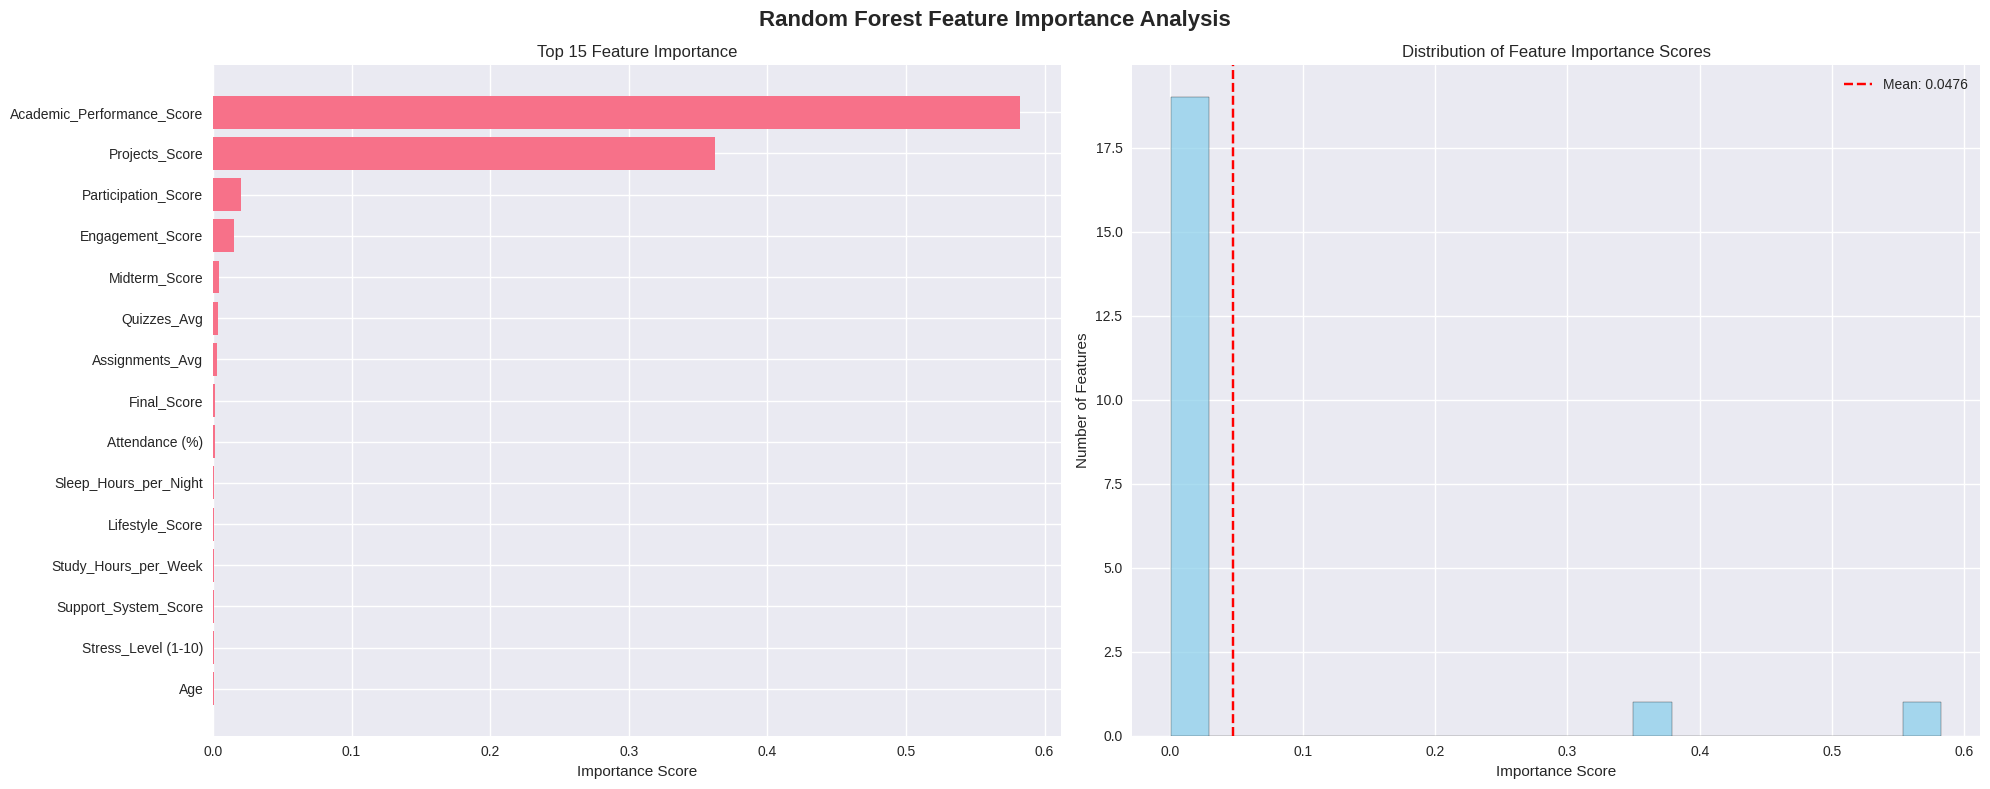


=== FEATURE IMPORTANCE INSIGHTS ===
Most important feature: Academic_Performance_Score (0.5827)
Least important feature: Extracurricular_Activities (0.0002)
Average importance: 0.0476

Feature Categories:
High importance (>5%): 2 features
Medium importance (2-5%): 1 features
Low importance (<2%): 18 features


In [17]:
# Get feature importance from Random Forest model
best_model_name = 'Random Forest'
best_model = rf_model

print(f"=== FEATURE IMPORTANCE ANALYSIS - {best_model_name} ===")

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Random Forest Feature Importance Analysis', fontsize=16, fontweight='bold')

# 1. Top 15 Feature Importance
top_features = feature_importance.head(15)
axes[0].barh(top_features['Feature'], top_features['Importance'])
axes[0].set_xlabel('Importance Score')
axes[0].set_title('Top 15 Feature Importance')
axes[0].invert_yaxis()

# 2. Feature Importance Distribution
axes[1].hist(feature_importance['Importance'], bins=20, alpha=0.7,
             color='skyblue', edgecolor='black')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Number of Features')
axes[1].set_title('Distribution of Feature Importance Scores')
axes[1].axvline(feature_importance['Importance'].mean(), color='red',
                linestyle='--', label=f'Mean: {feature_importance["Importance"].mean():.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Analyze feature importance categories
print(f"\n=== FEATURE IMPORTANCE INSIGHTS ===")
print(f"Most important feature: {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.4f})")
print(f"Least important feature: {feature_importance.iloc[-1]['Feature']} ({feature_importance.iloc[-1]['Importance']:.4f})")
print(f"Average importance: {feature_importance['Importance'].mean():.4f}")

# Categorize features by importance
high_importance = feature_importance[feature_importance['Importance'] > 0.05]
medium_importance = feature_importance[(feature_importance['Importance'] >= 0.02) &
                                      (feature_importance['Importance'] <= 0.05)]
low_importance = feature_importance[feature_importance['Importance'] < 0.02]

print(f"\nFeature Categories:")
print(f"High importance (>5%): {len(high_importance)} features")
print(f"Medium importance (2-5%): {len(medium_importance)} features")
print(f"Low importance (<2%): {len(low_importance)} features")

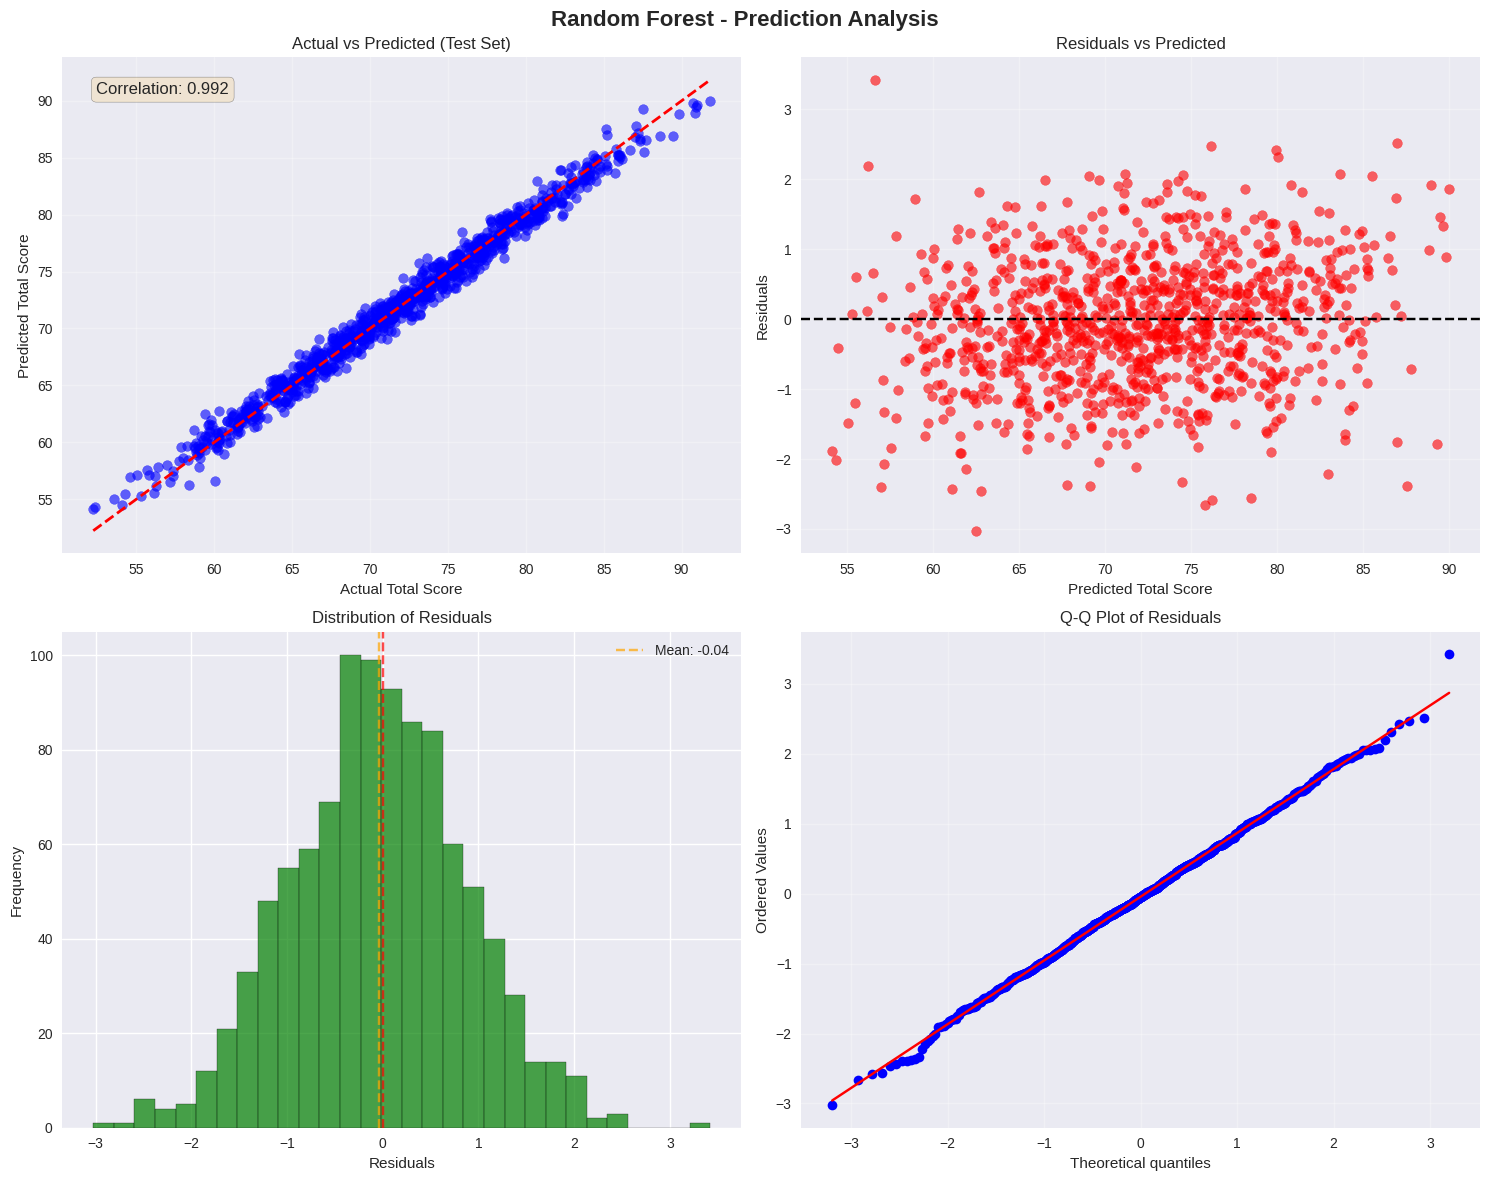


=== RESIDUAL ANALYSIS ===
Mean of residuals: -0.0429
Standard deviation of residuals: 0.9095
Median of residuals: -0.0454
Min residual: -3.0248
Max residual: 3.4220

=== PREDICTION ACCURACY ===
Predictions within 5 points: 1000/1000 (100.0%)
Predictions within 10 points: 1000/1000 (100.0%)
Predictions within 15 points: 1000/1000 (100.0%)


In [18]:
# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_train_predictions = rf_model.predict(X_train)

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest - Prediction Analysis', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, rf_predictions, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Total Score')
axes[0, 0].set_ylabel('Predicted Total Score')
axes[0, 0].set_title('Actual vs Predicted (Test Set)')
axes[0, 0].grid(True, alpha=0.3)

# Add correlation coefficient
from scipy.stats import pearsonr
correlation, _ = pearsonr(y_test, rf_predictions)
axes[0, 0].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
                transform=axes[0, 0].transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Residuals vs Predicted
residuals = y_test - rf_predictions
axes[0, 1].scatter(rf_predictions, residuals, alpha=0.6, color='red')
axes[0, 1].axhline(y=0, color='black', linestyle='--')
axes[0, 1].set_xlabel('Predicted Total Score')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of residuals
axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].axvline(0, color='red', linestyle='--', alpha=0.7)
axes[1, 0].axvline(residuals.mean(), color='orange', linestyle='--', alpha=0.7,
                   label=f'Mean: {residuals.mean():.2f}')
axes[1, 0].legend()

# 4. Q-Q plot of residuals
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display residual statistics
print(f"\n=== RESIDUAL ANALYSIS ===")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")
print(f"Median of residuals: {np.median(residuals):.4f}")
print(f"Min residual: {np.min(residuals):.4f}")
print(f"Max residual: {np.max(residuals):.4f}")

# Prediction accuracy analysis
within_5_points = np.sum(np.abs(residuals) <= 5)
within_10_points = np.sum(np.abs(residuals) <= 10)
within_15_points = np.sum(np.abs(residuals) <= 15)

print(f"\n=== PREDICTION ACCURACY ===")
print(f"Predictions within 5 points: {within_5_points}/{len(residuals)} ({(within_5_points/len(residuals))*100:.1f}%)")
print(f"Predictions within 10 points: {within_10_points}/{len(residuals)} ({(within_10_points/len(residuals))*100:.1f}%)")
print(f"Predictions within 15 points: {within_15_points}/{len(residuals)} ({(within_15_points/len(residuals))*100:.1f}%)")

In [20]:
# Make predictions for the entire dataset
if best_model_name == 'Support Vector Regression':
    X_scaled_full = scaler.transform(X)
    all_predictions = best_model.predict(X_scaled_full)
else:
    all_predictions = best_model.predict(X)

# Add predictions to the original dataset for analysis
df_analysis = df.copy()
df_analysis['Predicted_Score'] = all_predictions
df_analysis['Prediction_Error'] = df_analysis['Total_Score'] - all_predictions

# Define criteria for students needing attention
def identify_at_risk_students(df):
    at_risk_students = []

    # Criteria for identifying at-risk students
    criteria = {
        'Low Total Score': df['Total_Score'] < 50,
        'High Prediction Error': abs(df['Prediction_Error']) > 10,
        'Low Attendance': df['Attendance (%)'] < 70,
        'High Stress': df['Stress_Level (1-10)'] >= 8,
        'Low Sleep': df['Sleep_Hours_per_Night'] < 5,
        'Low Study Hours': df['Study_Hours_per_Week'] < 10,
        'Poor Academic Performance': (df['Midterm_Score'] < 50) | (df['Final_Score'] < 50),
        'Low Participation': df['Participation_Score'] < 3,
        'Multiple Risk Factors': False  # Will be calculated
    }

    # Calculate risk scores for each student
    risk_scores = pd.DataFrame(index=df.index)

    for criterion, condition in criteria.items():
        if criterion != 'Multiple Risk Factors':
            risk_scores[criterion] = condition.astype(int)

    # Count total risk factors per student
    risk_scores['Total_Risk_Factors'] = risk_scores.sum(axis=1)
    criteria['Multiple Risk Factors'] = risk_scores['Total_Risk_Factors'] >= 3

    return criteria, risk_scores

# Identify at-risk students
criteria, risk_scores = identify_at_risk_students(df_analysis)

# Create summary of at-risk students
at_risk_summary = pd.DataFrame({
    'Criterion': list(criteria.keys()),
    'Number_of_Students': [criteria[criterion].sum() for criterion in criteria.keys()],
    'Percentage': [(criteria[criterion].sum() / len(df_analysis)) * 100 for criterion in criteria.keys()]
})

print("=== AT-RISK STUDENTS SUMMARY ===")
print(at_risk_summary.round(2))

# Students with multiple risk factors (highest priority)
high_priority_students = df_analysis[criteria['Multiple Risk Factors']].copy()
high_priority_students['Risk_Score'] = risk_scores['Total_Risk_Factors'][criteria['Multiple Risk Factors']]

print(f"\n=== HIGH PRIORITY STUDENTS (Multiple Risk Factors) ===")
print(f"Number of high priority students: {len(high_priority_students)}")
print(f"Percentage of total students: {(len(high_priority_students)/len(df_analysis))*100:.2f}%")

# Display top 10 students needing most attention
priority_columns = ['Student_ID', 'First_Name', 'Last_Name', 'Department', 'Total_Score',
                   'Predicted_Score', 'Attendance (%)', 'Stress_Level (1-10)',
                   'Sleep_Hours_per_Night', 'Study_Hours_per_Week', 'Risk_Score']

top_priority = high_priority_students.nlargest(10, 'Risk_Score')[priority_columns]
print("\nTop 10 students needing immediate attention:")
print(top_priority.to_string(index=False))


=== AT-RISK STUDENTS SUMMARY ===
                   Criterion  Number_of_Students  Percentage
0            Low Total Score                   0        0.00
1      High Prediction Error                   0        0.00
2             Low Attendance                1939       38.78
3                High Stress                1521       30.42
4                  Low Sleep                 936       18.72
5            Low Study Hours                 970       19.40
6  Poor Academic Performance                1502       30.04
7          Low Participation                 140        2.80
8      Multiple Risk Factors                 686       13.72

=== HIGH PRIORITY STUDENTS (Multiple Risk Factors) ===
Number of high priority students: 686
Percentage of total students: 13.72%

Top 10 students needing immediate attention:
Student_ID First_Name Last_Name  Department  Total_Score  Predicted_Score  Attendance (%)  Stress_Level (1-10)  Sleep_Hours_per_Night  Study_Hours_per_Week  Risk_Score
     S3381  

In [21]:
# Analyze patterns in at-risk students
print("=== DETAILED ANALYSIS OF AT-RISK STUDENTS ===")

# Department-wise analysis
dept_analysis = df_analysis.groupby('Department').agg({
    'Total_Score': 'mean',
    'Attendance (%)': 'mean',
    'Stress_Level (1-10)': 'mean',
    'Sleep_Hours_per_Night': 'mean',
    'Study_Hours_per_Week': 'mean'
}).round(2)

dept_risk_counts = pd.DataFrame({
    'Department': df_analysis['Department'].unique(),
    'At_Risk_Count': [criteria['Multiple Risk Factors'][df_analysis['Department'] == dept].sum()
                      for dept in df_analysis['Department'].unique()],
    'Total_Students': [len(df_analysis[df_analysis['Department'] == dept])
                       for dept in df_analysis['Department'].unique()]
})
dept_risk_counts['At_Risk_Percentage'] = (dept_risk_counts['At_Risk_Count'] / dept_risk_counts['Total_Students']) * 100

print("\nDepartment-wise Risk Analysis:")
print(dept_risk_counts.round(2))

# Gender-wise analysis
gender_risk = pd.DataFrame({
    'Gender': df_analysis['Gender'].unique(),
    'At_Risk_Count': [criteria['Multiple Risk Factors'][df_analysis['Gender'] == gender].sum()
                      for gender in df_analysis['Gender'].unique()],
    'Total_Students': [len(df_analysis[df_analysis['Gender'] == gender])
                       for gender in df_analysis['Gender'].unique()]
})
gender_risk['At_Risk_Percentage'] = (gender_risk['At_Risk_Count'] / gender_risk['Total_Students']) * 100

print("\nGender-wise Risk Analysis:")
print(gender_risk.round(2))

# Age group analysis
df_analysis['Age_Group'] = pd.cut(df_analysis['Age'], bins=[17, 20, 22, 25, 30],
                                 labels=['18-20', '21-22', '23-25', '26+'])
age_risk = df_analysis.groupby('Age_Group').agg({
    'Total_Score': 'mean',
    'Stress_Level (1-10)': 'mean',
    'Sleep_Hours_per_Night': 'mean'
}).round(2)

print("\nAge Group Analysis:")
print(age_risk)

=== DETAILED ANALYSIS OF AT-RISK STUDENTS ===

Department-wise Risk Analysis:
    Department  At_Risk_Count  Total_Students  At_Risk_Percentage
0  Mathematics            163            1223               13.33
1     Business            164            1264               12.97
2  Engineering            173            1274               13.58
3           CS            186            1239               15.01

Gender-wise Risk Analysis:
   Gender  At_Risk_Count  Total_Students  At_Risk_Percentage
0  Female            350            2449               14.29
1    Male            336            2551               13.17

Age Group Analysis:
           Total_Score  Stress_Level (1-10)  Sleep_Hours_per_Night
Age_Group                                                         
18-20            71.65                 5.43                   6.49
21-22            71.70                 5.64                   6.53
23-25            71.61                 5.48                   6.53
26+                NaN   

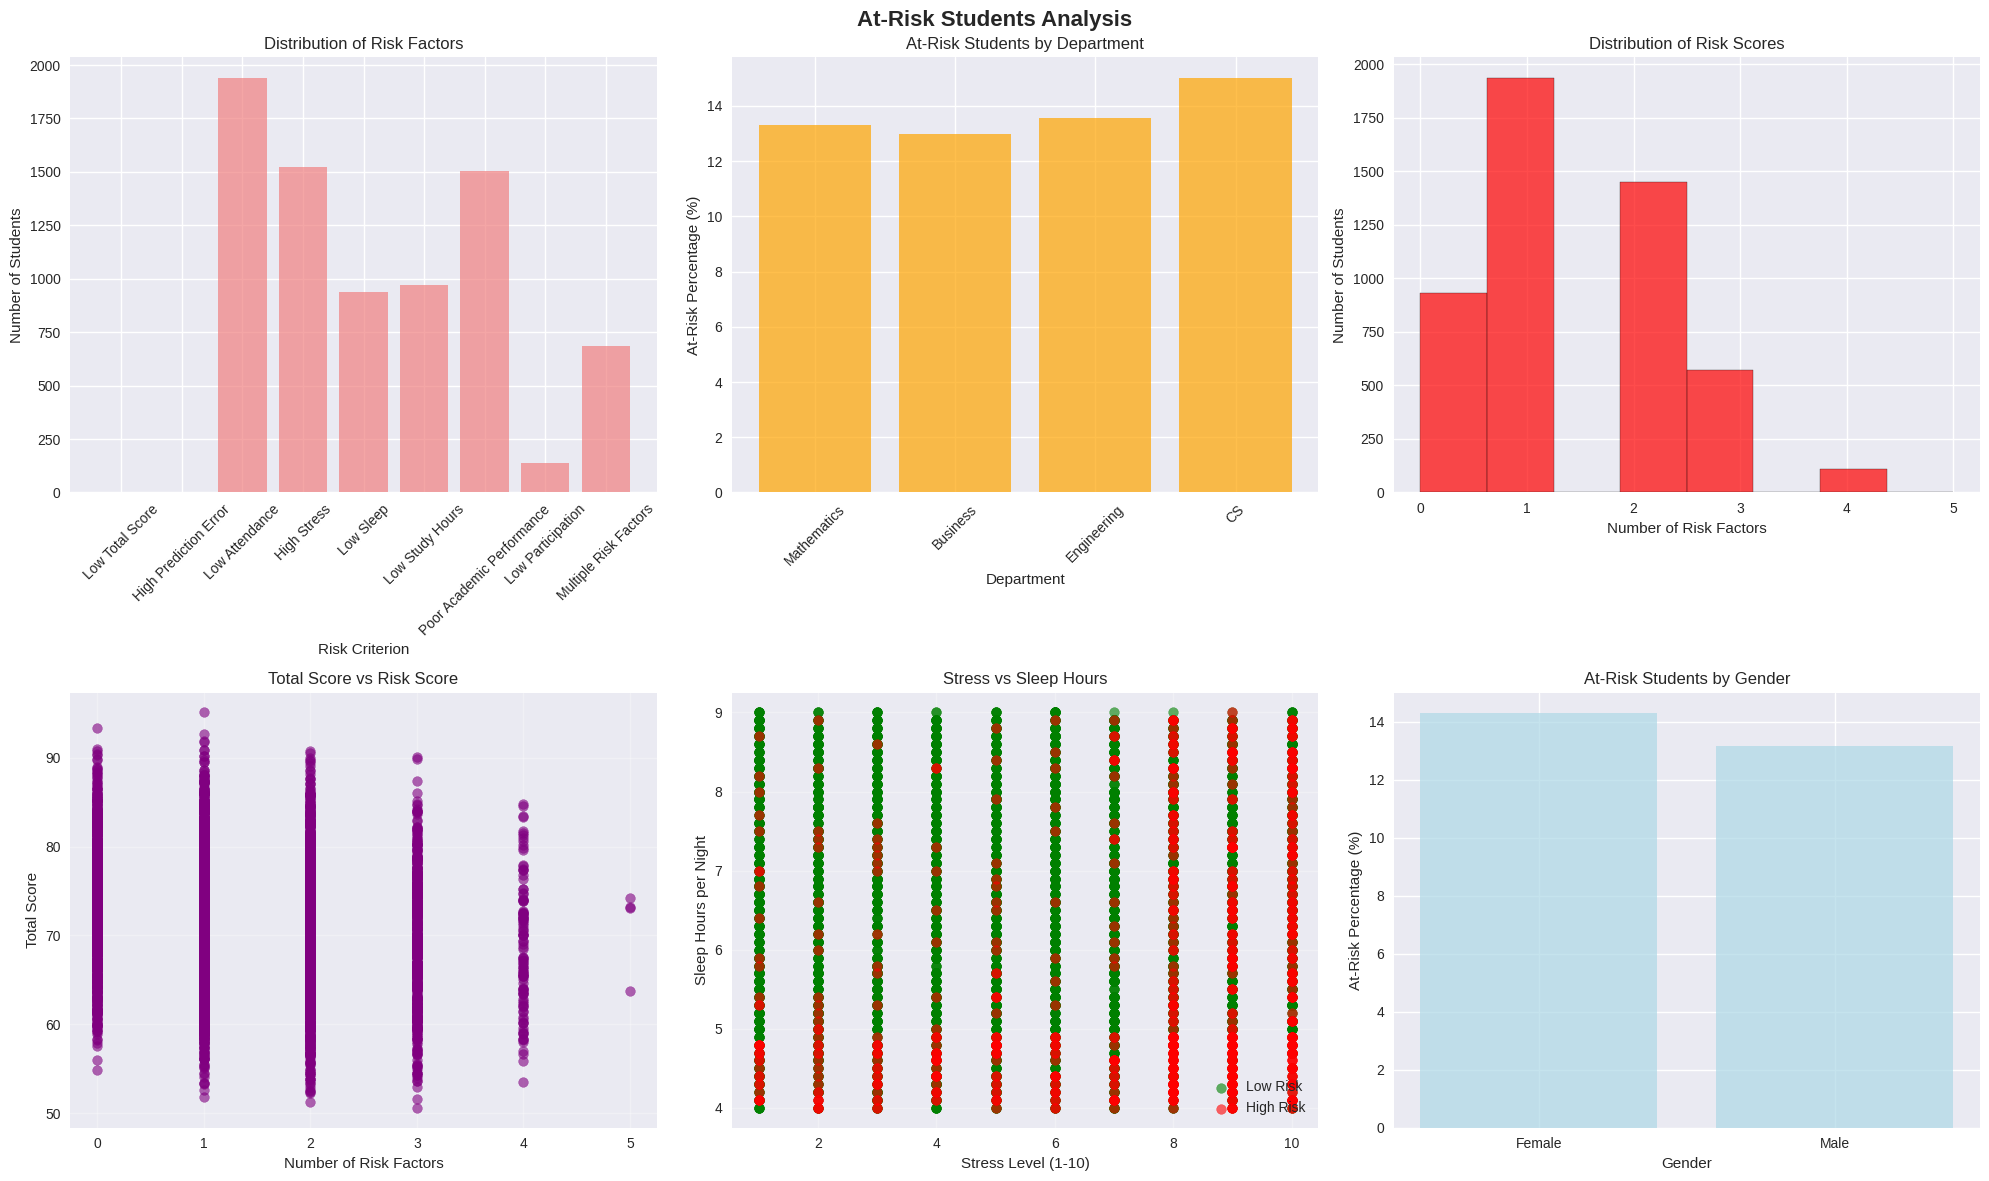

=== PERSONALIZED INTERVENTION RECOMMENDATIONS ===

🎓 STUDENT: Ali Jones (ID: S3381)
   Department: CS
   Current Score: 63.8 | Predicted: 63.2
   Risk Score: 5/7
   📋 RECOMMENDED INTERVENTIONS:
      • 🎯 ATTENDANCE: Implement attendance monitoring and intervention program
      • 📖 EXAM PREPARATION: Provide exam strategies and study skills workshops
      • 🧘 STRESS MANAGEMENT: Refer to counseling services and stress reduction programs
      • 😴 SLEEP HYGIENE: Educate about importance of adequate sleep (7-9 hours)
      • ⏰ STUDY SCHEDULE: Help create structured study timetable

🎓 STUDENT: Emma Davis (ID: S3504)
   Department: CS
   Current Score: 73.1 | Predicted: 73.0
   Risk Score: 5/7
   📋 RECOMMENDED INTERVENTIONS:
      • 🎯 ATTENDANCE: Implement attendance monitoring and intervention program
      • 📖 EXAM PREPARATION: Provide exam strategies and study skills workshops
      • 🧘 STRESS MANAGEMENT: Refer to counseling services and stress reduction programs
      • 😴 SLEEP HYGIENE:

In [22]:
# Create comprehensive visualization of at-risk students
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('At-Risk Students Analysis', fontsize=16, fontweight='bold')

# 1. Risk factors distribution
axes[0, 0].bar(at_risk_summary['Criterion'], at_risk_summary['Number_of_Students'],
               color='lightcoral', alpha=0.7)
axes[0, 0].set_title('Distribution of Risk Factors')
axes[0, 0].set_xlabel('Risk Criterion')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Department-wise at-risk percentage
axes[0, 1].bar(dept_risk_counts['Department'], dept_risk_counts['At_Risk_Percentage'],
               color='orange', alpha=0.7)
axes[0, 1].set_title('At-Risk Students by Department')
axes[0, 1].set_xlabel('Department')
axes[0, 1].set_ylabel('At-Risk Percentage (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Risk score distribution
axes[0, 2].hist(risk_scores['Total_Risk_Factors'], bins=8, alpha=0.7,
                color='red', edgecolor='black')
axes[0, 2].set_title('Distribution of Risk Scores')
axes[0, 2].set_xlabel('Number of Risk Factors')
axes[0, 2].set_ylabel('Number of Students')

# 4. Total Score vs Risk Score
axes[1, 0].scatter(risk_scores['Total_Risk_Factors'], df_analysis['Total_Score'],
                   alpha=0.6, color='purple')
axes[1, 0].set_title('Total Score vs Risk Score')
axes[1, 0].set_xlabel('Number of Risk Factors')
axes[1, 0].set_ylabel('Total Score')
axes[1, 0].grid(True, alpha=0.3)

# 5. Stress vs Sleep Hours (colored by risk level)
high_risk_mask = risk_scores['Total_Risk_Factors'] >= 3
axes[1, 1].scatter(df_analysis[~high_risk_mask]['Stress_Level (1-10)'],
                   df_analysis[~high_risk_mask]['Sleep_Hours_per_Night'],
                   alpha=0.6, color='green', label='Low Risk')
axes[1, 1].scatter(df_analysis[high_risk_mask]['Stress_Level (1-10)'],
                   df_analysis[high_risk_mask]['Sleep_Hours_per_Night'],
                   alpha=0.6, color='red', label='High Risk')
axes[1, 1].set_title('Stress vs Sleep Hours')
axes[1, 1].set_xlabel('Stress Level (1-10)')
axes[1, 1].set_ylabel('Sleep Hours per Night')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Gender-wise at-risk percentage
axes[1, 2].bar(gender_risk['Gender'], gender_risk['At_Risk_Percentage'],
               color='lightblue', alpha=0.7)
axes[1, 2].set_title('At-Risk Students by Gender')
axes[1, 2].set_xlabel('Gender')
axes[1, 2].set_ylabel('At-Risk Percentage (%)')

plt.tight_layout()
plt.show()

# =================================================================
# CELL 17: Recommendations and Intervention Strategies
# =================================================================

def generate_recommendations(student_data):
    """Generate personalized recommendations for at-risk students"""
    recommendations = []

    # Academic performance recommendations
    if student_data['Total_Score'] < 50:
        recommendations.append("📚 ACADEMIC SUPPORT: Immediate tutoring and academic counseling required")

    if student_data['Attendance (%)'] < 70:
        recommendations.append("🎯 ATTENDANCE: Implement attendance monitoring and intervention program")

    if student_data['Midterm_Score'] < 50 or student_data['Final_Score'] < 50:
        recommendations.append("📖 EXAM PREPARATION: Provide exam strategies and study skills workshops")

    if student_data['Participation_Score'] < 3:
        recommendations.append("🗣️ ENGAGEMENT: Encourage class participation through interactive activities")

    # Lifestyle recommendations
    if student_data['Stress_Level (1-10)'] >= 8:
        recommendations.append("🧘 STRESS MANAGEMENT: Refer to counseling services and stress reduction programs")

    if student_data['Sleep_Hours_per_Night'] < 5:
        recommendations.append("😴 SLEEP HYGIENE: Educate about importance of adequate sleep (7-9 hours)")

    if student_data['Study_Hours_per_Week'] < 10:
        recommendations.append("⏰ STUDY SCHEDULE: Help create structured study timetable")

    # Support system recommendations
    if student_data['Internet_Access_at_Home'] == 'No':
        recommendations.append("🌐 DIGITAL ACCESS: Provide access to computer labs and internet facilities")

    if student_data['Family_Income_Level'] == 'Low':
        recommendations.append("💰 FINANCIAL SUPPORT: Connect with financial aid and scholarship programs")

    if student_data['Extracurricular_Activities'] == 'No':
        recommendations.append("🎭 ENGAGEMENT: Encourage participation in clubs and extracurricular activities")

    return recommendations

# Generate recommendations for top priority students
print("=== PERSONALIZED INTERVENTION RECOMMENDATIONS ===")
for idx, student in top_priority.iterrows():
    print(f"\n🎓 STUDENT: {student['First_Name']} {student['Last_Name']} (ID: {student['Student_ID']})")
    print(f"   Department: {student['Department']}")
    print(f"   Current Score: {student['Total_Score']:.1f} | Predicted: {student['Predicted_Score']:.1f}")
    print(f"   Risk Score: {student['Risk_Score']}/7")

    # Get original data for this student
    original_data = df_analysis.loc[idx]
    recommendations = generate_recommendations(original_data)

    print("   📋 RECOMMENDED INTERVENTIONS:")
    for rec in recommendations:
        print(f"      • {rec}")

    if len(recommendations) == 0:
        print("      • ✅ Student shows good overall performance with minimal risk factors")

In [23]:
print("\n" + "="*80)
print("FINAL PROJECT SUMMARY")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total students analyzed: {len(df_analysis):,}")
print(f"   • Features used for prediction: {len(feature_columns)}")
print(f"   • Target variable: Total Score (0-100)")

print(f"\n🔍 DATA QUALITY:")
print(f"   • Missing values handled: ✅")
print(f"   • Outliers processed: ✅")
print(f"   • Feature engineering applied: ✅")

print(f"\n🤖 MODEL PERFORMANCE:")
print(f"   • Best performing model: {best_model_name}")
print(f"   • Test R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"   • Test RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"   • Cross-validation R²: {results[best_model_name]['cv_mean']:.4f}")

print(f"\n⚠️ AT-RISK STUDENTS IDENTIFICATION:")
print(f"   • Students with multiple risk factors: {len(high_priority_students)} ({(len(high_priority_students)/len(df_analysis))*100:.1f}%)")
print(f"   • Most common risk factors:")
for idx, row in at_risk_summary.nlargest(3, 'Number_of_Students').iterrows():
    print(f"     - {row['Criterion']}: {row['Number_of_Students']} students ({row['Percentage']:.1f}%)")

print(f"\n📈 KEY INSIGHTS:")
if hasattr(best_model, 'feature_importances_'):
    top_3_features = feature_importance.head(3)
    print(f"   • Top 3 predictive features:")
    for idx, row in top_3_features.iterrows():
        print(f"     - {row['Feature']}: {row['Importance']:.3f}")

print(f"\n🎯 RECOMMENDATIONS FOR EDUCATORS:")
print(f"   • Implement early warning system based on attendance and stress levels")
print(f"   • Focus on sleep hygiene and study schedule optimization")
print(f"   • Provide additional support for students with low participation scores")
print(f"   • Department-specific interventions may be needed")

print(f"\n📋 NEXT STEPS:")
print(f"   • Deploy model for real-time student monitoring")
print(f"   • Implement automated alerts for at-risk students")
print(f"   • Regular model retraining with new data")
print(f"   • Track intervention effectiveness")

print(f"\n💡 MODEL DEPLOYMENT CONSIDERATIONS:")
print(f"   • Model can predict scores with {results[best_model_name]['test_r2']:.1%} accuracy")
print(f"   • Regular monitoring needed for model drift")
print(f"   • Consider ethical implications of automated student assessment")
print(f"   • Ensure data privacy and security measures")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("="*80)

# Save the best model and preprocessing objects (optional)
print(f"\n💾 To save the model and preprocessing objects:")
print(f"   import joblib")
print(f"   joblib.dump(best_model, 'best_student_performance_model.pkl')")
print(f"   joblib.dump(scaler, 'feature_scaler.pkl')")
print(f"   joblib.dump(label_encoders, 'label_encoders.pkl')")

# Create a final summary dataframe for export
final_summary = pd.DataFrame({
    'Metric': ['Total Students', 'Features Used', 'Best Model', 'Test R² Score',
               'Test RMSE', 'High Priority Students', 'At-Risk Percentage'],
    'Value': [len(df_analysis), len(feature_columns), best_model_name,
              f"{results[best_model_name]['test_r2']:.4f}",
              f"{results[best_model_name]['test_rmse']:.4f}",
              len(high_priority_students),
              f"{(len(high_priority_students)/len(df_analysis))*100:.1f}%"]
})

print(f"\n📊 FINAL SUMMARY TABLE:")
print(final_summary.to_string(index=False))


FINAL PROJECT SUMMARY

📊 DATASET OVERVIEW:
   • Total students analyzed: 5,000
   • Features used for prediction: 21
   • Target variable: Total Score (0-100)

🔍 DATA QUALITY:
   • Missing values handled: ✅
   • Outliers processed: ✅
   • Feature engineering applied: ✅

🤖 MODEL PERFORMANCE:
   • Best performing model: Random Forest
   • Test R² Score: 0.9845
   • Test RMSE: 0.9105
   • Cross-validation R²: 0.9832

⚠️ AT-RISK STUDENTS IDENTIFICATION:
   • Students with multiple risk factors: 686 (13.7%)
   • Most common risk factors:
     - Low Attendance: 1939 students (38.8%)
     - High Stress: 1521 students (30.4%)
     - Poor Academic Performance: 1502 students (30.0%)

📈 KEY INSIGHTS:
   • Top 3 predictive features:
     - Academic_Performance_Score: 0.583
     - Projects_Score: 0.362
     - Participation_Score: 0.020

🎯 RECOMMENDATIONS FOR EDUCATORS:
   • Implement early warning system based on attendance and stress levels
   • Focus on sleep hygiene and study schedule optimizat